In [1]:
#Importing req libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
#Importing keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Conv2D , MaxPool2D , Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD


2023-06-05 21:04:49.879578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 21:04:50.757208: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
np.random.seed(0)

#Loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

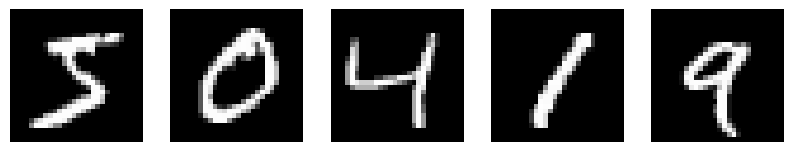

In [3]:
#plotting few random images as black and white
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#building the model
model = Sequential(
    [
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPool2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ]
)
#compiling the model
model.compile(optimizer=Adam(lr=0.04), loss='categorical_crossentropy', metrics=['accuracy']) #lr=learning rate, loss=loss function, metrics=accuracy
model.summary()

2023-06-05 21:04:52.604979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-05 21:04:52.605014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: kalyan-linux
2023-06-05 21:04:52.605022: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: kalyan-linux
2023-06-05 21:04:52.605150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-05 21:04:52.605173: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-05 21:04:52.605179: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
from keras.callbacks import TensorBoard

model.fit(X_train.reshape(-1,28,28,1), to_categorical(y_train), epochs=10, validation_split=0.2,callbacks=[TensorBoard('CNN_logs')])

Epoch 1/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.3117 - accuracy: 0.9341 - val_loss: 0.0897 - val_accuracy: 0.9741
Epoch 2/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.0729 - val_accuracy: 0.9795
Epoch 3/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0581 - val_accuracy: 0.9834
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0553 - val_accuracy: 0.9845
Epoch 5/10
1500/1500 [==============================] - 29s 19ms/step - loss: 0.0373 - accuracy: 0.9885 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0494 - val_accuracy: 0.9868
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0800 -

In [7]:
model.evaluate(X_test.reshape(-1,28,28,1), to_categorical(y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0751 - accuracy: 0.9813


[0.07505246251821518, 0.9812999963760376]